# Kolmogorov-Smirnov Test

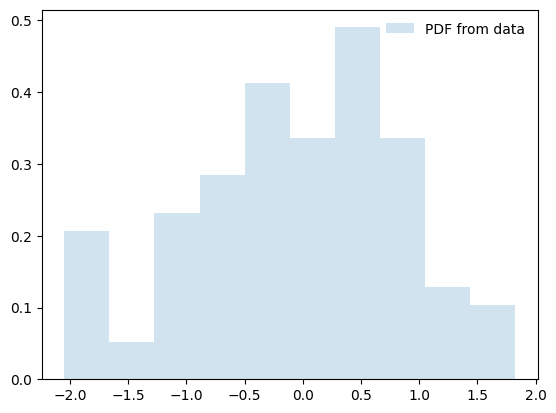

KstestResult(statistic=0.08670093616890884, pvalue=0.41629919685853356)

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

def calc_pdf(data, bins=10):
    # getting data of the histogram
    count, bins_count = np.histogram(data, bins=bins)
    pdf = count / sum(count)
    return pdf, bins_count

def calc_cdf(data, bins=10):
    pdf, bins_count = calc_pdf(data, bins)
    cdf = np.cumsum(pdf)
    return bins_count[1:], cdf

rng = np.random.default_rng()

r = stats.norm.rvs(loc=0, scale=1, size=100)
# r = np.linspace(0,10)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(r, 'norm')

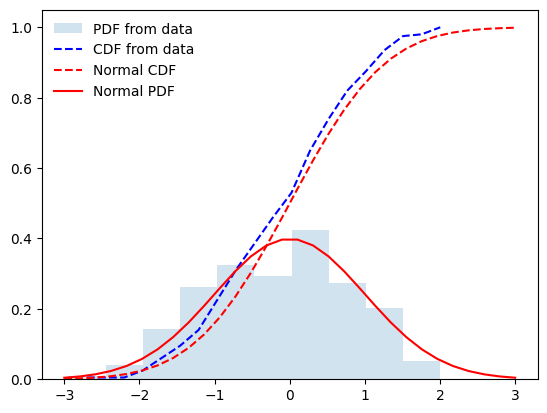

KstestResult(statistic=0.08140973582739414, pvalue=0.13352414195097195)

In [7]:
###########################################
# KS One-Sample test

r = stats.norm.rvs(loc=0, scale=1, size=200)
bc, cdf = calc_cdf(r, 20)

xs = np.linspace(-3, 3, 30)

fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.plot(bc, cdf, 'b--', label="CDF from data")
ax.plot(xs, stats.norm.cdf(xs, 0, 1), 'r--', label="Normal CDF")
ax.plot(xs, stats.norm.pdf(xs, 0, 1), label="Normal PDF", color="red")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(r, 'norm')

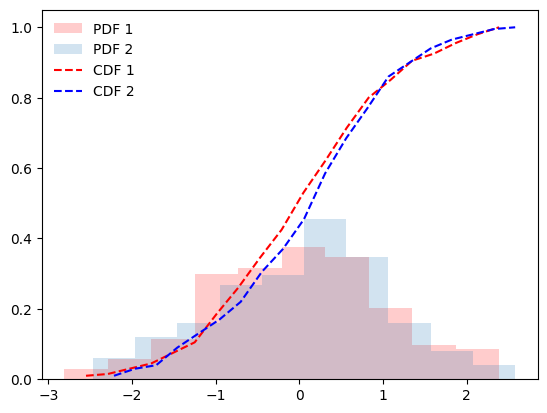

KstestResult(statistic=0.105, pvalue=0.220541217580421)

In [8]:
###########################################
# KS Two-Sample test 

r = stats.norm.rvs(loc=0, scale=1, size=200)
bc, cdf = calc_cdf(r, 20)
r2 = stats.norm.rvs(loc=0, scale=1, size=200)
bc2, cdf2 = calc_cdf(r2, 20)

fig, ax = plt.subplots(1, 1)
ax.hist(r, color='r', density=True, histtype='stepfilled', alpha=0.2, label="PDF 1")
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2, label="PDF 2")

ax.plot(bc, cdf, 'r--', label="CDF 1")
ax.plot(bc2, cdf2, 'b--', label="CDF 2")
ax.legend(loc='best', frameon=False)
plt.show()

###################################

stats.ks_2samp(r, r2)

# Kullback-Leibler and Jensen-Shannon Divergences

KL Divergence:  193.86667202342164
JS Divergence:  24.527893876745843


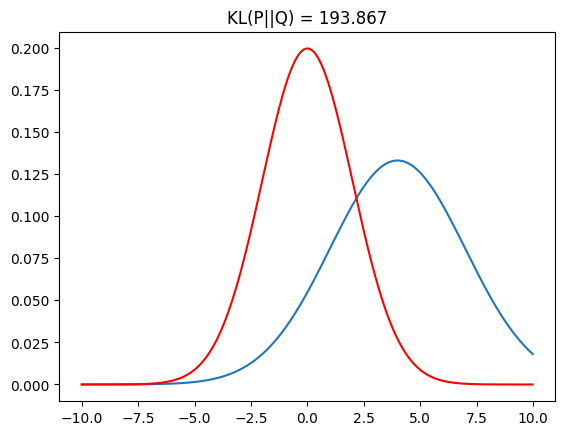

In [10]:
import numpy as np

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

r = stats.norm.rvs(loc=2, scale=20, size=100)
r2 = stats.norm.rvs(loc=0, scale=2, size=100)

x = np.arange(-10, 10, 0.01)
p = norm.pdf(x, 4, 3)
q = norm.pdf(x, 0, 2)

print('KL Divergence: ' , kl_divergence(p, q))
print('JS Divergence: ' , js_divergence(p, q))

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')


# Chi-square Test

In [91]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn import preprocessing
import numpy as np

significance = 0.05

arr1 = np.array([23, 16, 14, 19, 28])
# arr2 = np.array([20, 20, 20, 20, 20])
# arr2 = np.array([20, 15, 20, 20, 15])
# arr2 = np.array([40, 20, 20, 10, 5])

# arr2 = arr2 / np.sum(arr2)
# arr1 = arr1 / np.sum(arr1)

# ######################################################
# Goodness for fit
# H0: Sample are drawn from the sample distribution
print("Chi-square goodness for fit")
# print(chisquare(arr1, f_exp=arr2))
print(chisquare(arr1))

# ######################################################
# # Test for Independence
# # Null hypothesis (H0): Variable 1 and variable 2 are not related in the population; The proportions of variable 1 are the same for different values of variable 2.
# # Alternative hypothesis (Ha): Variable 1 and  variable 2 are related in the population; The proportions of variable 1 are not the same for different values of  variable 2.
# obs = np.array([arr1, arr2])
# chi2, p, dof, ex = chi2_contingency(obs, correction=True)
# print("Chi-square Independence:")
# print("Chi-square statitic: ", chi2)
# print("p-value: " , p)
# print("DOF: " , dof)
# print("Expected values:" , ex)

# print(stats.chisquare(obs.ravel(), f_exp=ex.ravel(),
#                              ddof=obs.size - 1 - dof))

# if p <= significance:
# 	print('reject Ho - They come from a different distribution')
# else:
# 	print('accept Ho - They come from same distribution')


Chi-square goodness for fit
Power_divergenceResult(statistic=6.3, pvalue=0.1778363264982168)


In [ ]:
print("Chi-square goodness for fit: obs vs exp")
print(stats.chisquare(obs.ravel(), f_exp=ex.ravel(), ddof=obs.size - 1 - dof))


In [68]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
# data = [[16, 18, 16, 14, 12, 12],
# 		[6, 6, 16, 12, 15, 10]]
# data = [[100, 200, 300, 300, 500, 500], [7, 600, 500, 400, 300, 200]]
data = [[23, 16, 14, 19, 28], [20, 20, 20, 20, 20]]
print(data)
stat, p, dof, expected = chi2_contingency(data)
print(expected)
# interpret test-statistic
prob = 0.95
chi = chi2.ppf(prob, dof)
print(p)

significance = 1 - prob
if p <= significance:
	print('reject Ho - they are not independent - they are dependent')
else:
	print('accept Ho - They are independent')

[[23, 16, 14, 19, 28], [20, 20, 20, 20, 20]]
[[21.5 18.  17.  19.5 24. ]
 [21.5 18.  17.  19.5 24. ]]
0.5459247833218352
accept Ho - They are independent
